In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
credits = pd.read_csv("data/tmdb_5000_credits.csv") 
movies_df = pd.read_csv("data/tmdb_5000_movies.csv") 

In [3]:
print("Credits:", credits.shape) 
print("Movies Dataframe:", movies_df.shape)

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


In [4]:
credits_column_renamed = credits.rename(columns={"movie_id": "id"}) 
movies_df_merge = movies_df.merge(credits_column_renamed, on='id') 

In [5]:
movies_cleaned_df = movies_df_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries']) 


In [7]:
v = movies_cleaned_df['vote_count'] 
R = movies_cleaned_df['vote_average'] 
C = movies_cleaned_df['vote_average'].mean() 
m = movies_cleaned_df['vote_count'].quantile(0.70) 
movies_cleaned_df['weighted_average'] = ((R * v) + (C * m)) / (v + m) 


In [8]:
movie_sorted_ranking = movies_cleaned_df.sort_values('weighted_average', ascending=False)

In [9]:
print(
    movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)
)

                                         original_title  vote_count  \
1881                           The Shawshank Redemption        8205   
3337                                      The Godfather        5893   
662                                          Fight Club        9413   
3232                                       Pulp Fiction        8428   
65                                      The Dark Knight       12002   
809                                        Forrest Gump        7927   
1818                                   Schindler's List        4329   
3865                                           Whiplash        4254   
96                                            Inception       13752   
1990                            The Empire Strikes Back        5879   
2294                                           千と千尋の神隠し        3840   
95                                         Interstellar       10867   
2731                             The Godfather: Part II        3338   
329   

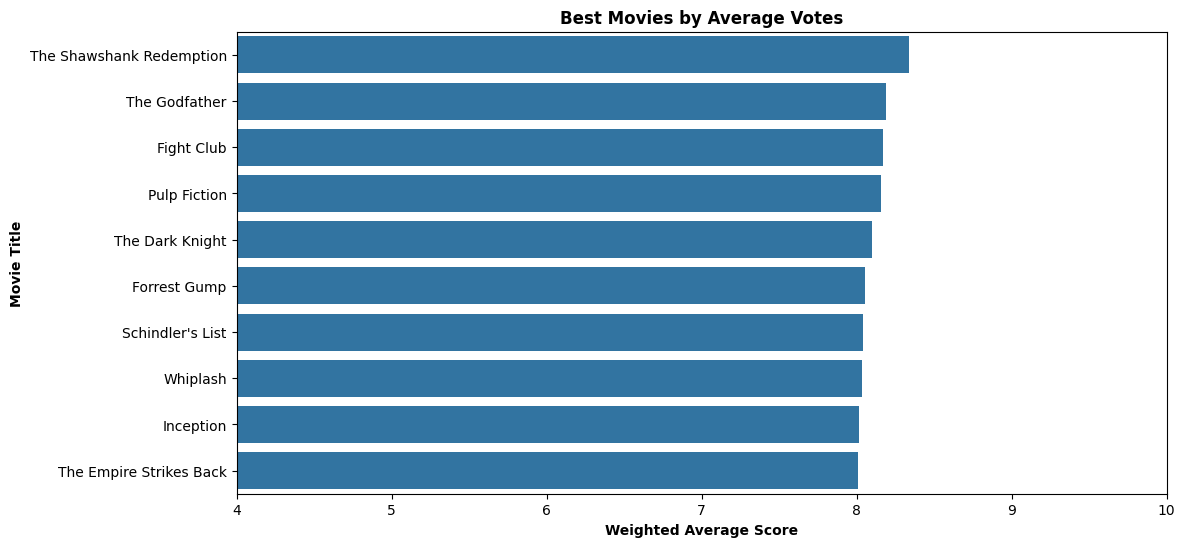

In [10]:
plt.figure(figsize=(12,6)) 
sns.barplot(
    x=movie_sorted_ranking['weighted_average'].head(10), 
    y=movie_sorted_ranking['original_title'].head(10), 
    data=movie_sorted_ranking
)
plt.xlim(4, 10) 
plt.title('Best Movies by Average Votes', weight='bold') 
plt.xlabel('Weighted Average Score', weight='bold') 
plt.ylabel('Movie Title', weight='bold') 
plt.savefig('best_movies.png') 


In [11]:
popularity = movies_cleaned_df.sort_values('popularity', ascending=False)

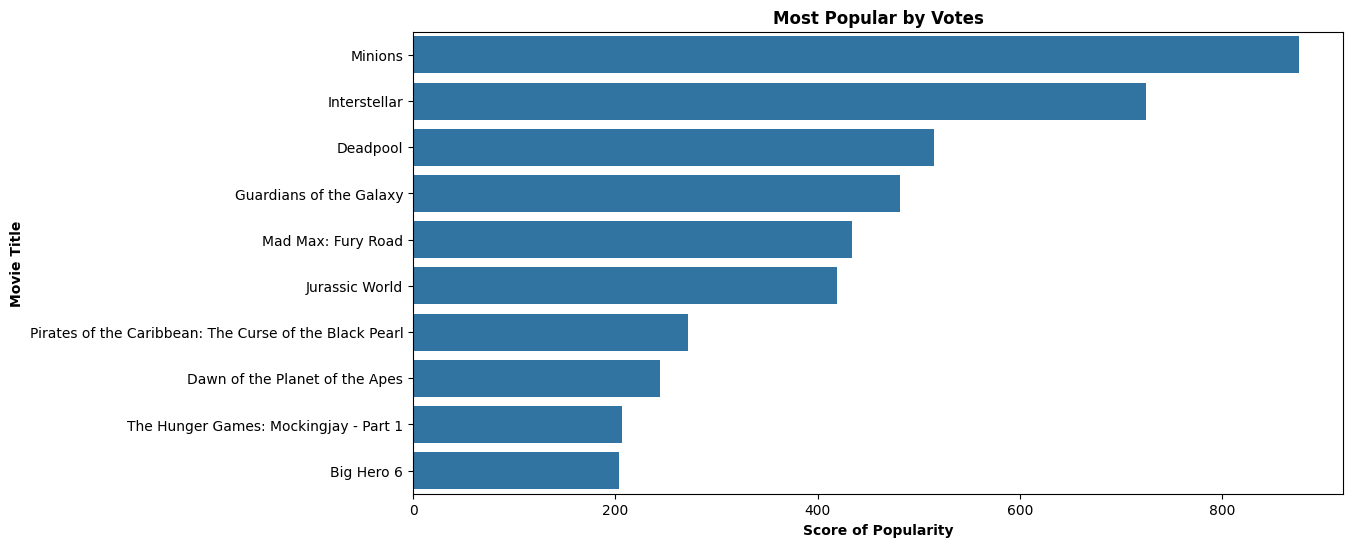

In [12]:
plt.figure(figsize=(12,6)) 
sns.barplot(
    x=popularity['popularity'].head(10), 
    y=popularity['original_title'].head(10), 
    data=popularity
)
plt.title('Most Popular by Votes', weight='bold') 
plt.xlabel('Score of Popularity', weight='bold') 
plt.ylabel('Movie Title', weight='bold') 
plt.savefig('best_popular_movies.png') 

In [13]:
scaling = MinMaxScaler() 
movie_scaled_df = scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']]) 

movie_normalized_df = pd.DataFrame(movie_scaled_df, columns=['normalized_weight_average','normalized_popularity']) 
movies_cleaned_df[['normalized_weight_average','normalized_popularity']] = movie_normalized_df 

In [14]:
movies_cleaned_df['score'] = (movies_cleaned_df['normalized_weight_average'] * 0.5 + 
                               movies_cleaned_df['normalized_popularity'] * 0.5)

In [15]:
movies_scored_df = movies_cleaned_df.sort_values('score', ascending=False) 


C:\Users\sanja\AppData\Local\Temp\ipykernel_18456\2730196358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


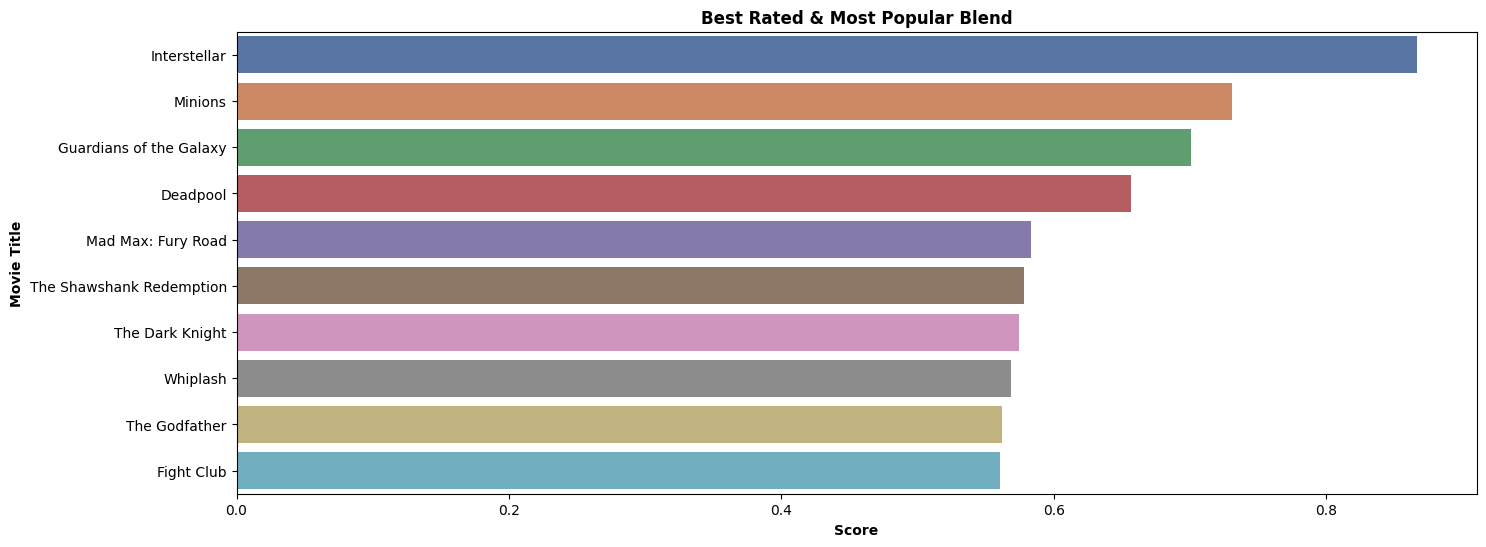

In [16]:
plt.figure(figsize=(16,6)) 
sns.barplot(
    x=movies_scored_df['score'].head(10), 
    y=movies_scored_df['original_title'].head(10), 
    data=movies_scored_df, 
    palette='deep'
)
plt.title('Best Rated & Most Popular Blend', weight='bold') 
plt.xlabel('Score', weight='bold') 
plt.ylabel('Movie Title', weight='bold') 
plt.savefig('scored_movies.png')